<h1> Quiz 1 Pemahaman tentang Model Selection</h1>

Jelaskan dengan bahasa kalian sendiri

1. Apa itu Bias dan Variance?
2. Apa itu Overfitting dan Underfitting?
3. Apa yang bisa kita lakukan untuk mengatur kompleksitas dari model?
4. Bagaimana model yang baik?
5. Kapan kira2 kita menggunakan GridSearchcv dan kapan menggunakan RandomizedSearchCV?

1. Bias adalah sebuah error dikarenakan model yang dibuat terlalu simple sehingga menimbulkan error tersebut sedangkan variance adalah sebuah error dikarenakan model yang dibuat terlalu kompleks sehingga terjadilah error.

2. Overfitting adalah kemampuan suatu model dalam mempelajari data training secara detail sehingga mengakibatkan penurunan pembelajaran pada data test, sedangkan underfitting adalah kemampuan suatu model yang kurang dalam mempelajari data training sehingga mengakibatkan tingkat akurasi data test serta data training yang buruk.

3. Menyesuaikan model yang telah kita buat dengan data training dan data test, apabila model yang kita buat mempelajari data training dengan baik maka perlu disesuaikan kembali dengan data test kita, agar model kita tidak salah memprediksi karena terlalu detailnya mempelajari data training, oleh karena itu perlu disesuaikan kapan model kita perlu berhenti belajar dan berganti mempelajari data test supaya seimbang

4. Model yang mempunyai error bias dan error variance yang berukuran kecil, sehingga perlu dicari nilai tengah (trade off) dari kedua error tersebut

5. GridSearchCV digunakan ketika kita ingin mencoba seluruh kemungkinan nilai yang ada pada kumpulan data dengan resiko menunggu waktu yang cukup lama sedangkan RandomizedSearchCV digunakan ketika kita hanya ingin mengetahui beberapa nilai saja dari semua kumpulan data dengan waktu yang relatif cepat

<h1> Quiz 2 Praktis Model Selection</h1>

1. Bagi kedua data ini menjadi data training dan data test dengan test_size=0.25.
2. Gunakan algoritma KNN sebagai model classifier.
3. Gunakan fungsi GridSearchCV untuk hyperparameter tuning dan model selection.
4. jumlah fold bebas!, gunakan scoring 'roc_auc'
5. Definisikan kombinasi hyperparameter untuk model selection dengan GridSearchCV. kombinasi Hyperparameter bebas, baca lagi dokumentasi KNN di link berikut https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html untuk memahami lagi jenis2 hyperparameter di algorithma KNN.
6. Latih model terhadap data training.
7. Apa hyperparameter terbaik untuk kombinasi hyperparameter kalian?
8. Berapa score validasi terbaik dari model tersebut?
9. Prediksi probabilitasi output dari model yang telah di buat terhadap data test. note : gunakan method .predict_proba() untuk menghasilkan output probabilitas
10. Perhatikan bahwa hasil prediksi ada 2, dimana masing2 adalah nilai probabilitas untuk setiap class label. Ambil nilai probabilitas pasien phositive meninggal dalam waktu kurang dari 5 tahun. note : gunakan bantuan attirubte .classes_ untuk mengetahui urutan label dari hasil prediksi probabilitas.
11. Berapa nilai score roc_auc untuk data test?
12. Apakah model anda termasuk baik atau overtting atau underfitting?
13. Ulangi tahap di atas namun kali ini menggunakan algoritma DecisionTreeClassifier dan kalian bisa menggunakan RandomizedSearchCV apabila process training lama. pelajari algoritma DecisionTreeClassifier di linkberikut : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier
14. Bandingkan scorenya dengan Algoritma KNN, mana yang lebih baik?

Note : Data Science adalah experiment, sangat di dimungkinkan memerlukan beberapa kali percobaan untuk mendapatkan hasil yang terbaik! Happy Coding :)

In [0]:
import pandas as pd

url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/haberman.csv'
list_cols = ['Age', "Patient's Years", "N_positive_ax", "survival_status"]
df = pd.read_csv(url, names=list_cols)

In [0]:
df.head()

,Age,Patient's Years,N_positive_ax,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [0]:
# 1. Bagi kedua data ini menjadi data training dan data test dengan test_size=0.25.
from sklearn.model_selection import train_test_split

X = df.drop('survival_status', axis=1)
y = df['survival_status']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21, stratify=y, test_size=0.25)

In [0]:
# 2. Gunakan algoritma KNN sebagai model classifier.
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier(n_neighbors=5)

In [0]:
# 3. Gunakan fungsi GridSearchCV untuk hyperparameter tuning dan model selection.
# 4. jumlah fold bebas!, gunakan scoring 'roc_auc'
import numpy as np

from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

param_grid = {'n_neighbors':np.arange(5, 50), 'weights':['distance', 'uniform']}

In [0]:
# 5. Definisikan kombinasi hyperparameter untuk model selection dengan GridSearchCV. kombinasi Hyperparameter bebas, baca lagi dokumentasi KNN di link berikut https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html untuk memahami lagi jenis2 hyperparameter di algorithma KNN.
gscv = GridSearchCV(model, param_grid=param_grid, scoring='roc_auc', cv=5)

In [0]:
# 6. Latih model terhadap data training.
gscv.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                         'weights': ['distance', 'uniform']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=0)

In [0]:
# 7. Apa hyperparameter terbaik untuk kombinasi hyperparameter kalian?
gscv.best_params_

{'n_neighbors': 40, 'weights': 'uniform'}

In [0]:
# 8. Berapa score validasi terbaik dari model tersebut?
gscv.best_score_

0.7151062091503269

In [0]:
# 9. Prediksi probabilitasi output dari model yang telah di buat terhadap data test. note : gunakan method .predict_proba() untuk menghasilkan output probabilitas
gscv.predict_proba(X_test)

array([[0.725, 0.275],
       [0.725, 0.275],
       [0.65 , 0.35 ],
       [0.5  , 0.5  ],
       [0.7  , 0.3  ],
       [0.825, 0.175],
       [0.8  , 0.2  ],
       [0.8  , 0.2  ],
       [0.75 , 0.25 ],
       [0.7  , 0.3  ],
       [0.375, 0.625],
       [0.875, 0.125],
       [0.75 , 0.25 ],
       [0.85 , 0.15 ],
       [0.85 , 0.15 ],
       [0.925, 0.075],
       [0.8  , 0.2  ],
       [0.75 , 0.25 ],
       [0.775, 0.225],
       [0.475, 0.525],
       [0.875, 0.125],
       [0.85 , 0.15 ],
       [0.85 , 0.15 ],
       [0.375, 0.625],
       [0.875, 0.125],
       [0.925, 0.075],
       [0.85 , 0.15 ],
       [0.875, 0.125],
       [0.9  , 0.1  ],
       [0.825, 0.175],
       [0.9  , 0.1  ],
       [0.425, 0.575],
       [0.8  , 0.2  ],
       [0.8  , 0.2  ],
       [0.475, 0.525],
       [0.8  , 0.2  ],
       [0.85 , 0.15 ],
       [0.8  , 0.2  ],
       [0.875, 0.125],
       [0.8  , 0.2  ],
       [0.5  , 0.5  ],
       [0.85 , 0.15 ],
       [0.75 , 0.25 ],
       [0.5

In [0]:
# 10. Perhatikan bahwa hasil prediksi ada 2, dimana masing2 adalah nilai probabilitas untuk setiap class label. Ambil nilai probabilitas pasien phositive meninggal dalam waktu kurang dari 5 tahun. note : gunakan bantuan attirubte .classes_ untuk mengetahui urutan label dari hasil prediksi probabilitas.
print(gscv.classes_)
# Survival status (class attribute)
    #  1 = the patient survived 5 years or longer (Array = 0)
    #  2 = the patient died within 5 year         (Array = 1)
gscv.predict_proba(X_test)[:,1]

[1 2]


array([0.275, 0.275, 0.35 , 0.5  , 0.3  , 0.175, 0.2  , 0.2  , 0.25 ,
       0.3  , 0.625, 0.125, 0.25 , 0.15 , 0.15 , 0.075, 0.2  , 0.25 ,
       0.225, 0.525, 0.125, 0.15 , 0.15 , 0.625, 0.125, 0.075, 0.15 ,
       0.125, 0.1  , 0.175, 0.1  , 0.575, 0.2  , 0.2  , 0.525, 0.2  ,
       0.15 , 0.2  , 0.125, 0.2  , 0.5  , 0.15 , 0.25 , 0.45 , 0.2  ,
       0.075, 0.2  , 0.1  , 0.125, 0.6  , 0.2  , 0.6  , 0.125, 0.225,
       0.15 , 0.15 , 0.15 , 0.5  , 0.175, 0.625, 0.55 , 0.15 , 0.25 ,
       0.15 , 0.25 , 0.25 , 0.225, 0.25 , 0.35 , 0.075, 0.275, 0.125,
       0.25 , 0.575, 0.25 , 0.15 , 0.6  ])

In [0]:
# 11. Berapa nilai score roc_auc untuk data test?
from sklearn.model_selection import cross_validate

cv_score = cross_validate(model, X_test, y_test, cv=10, return_train_score=True)
cv_score['test_score'].mean()

0.7160714285714286

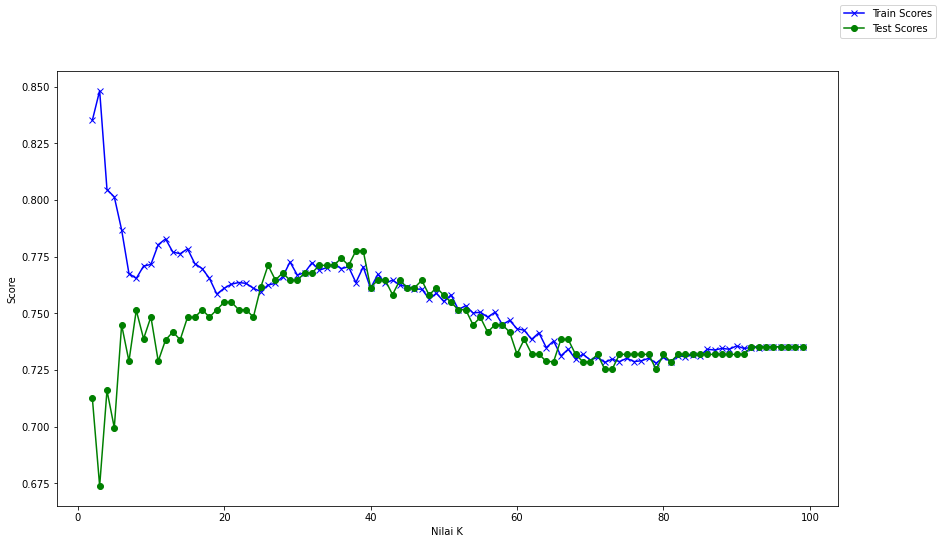

In [0]:
# 12. Apakah model anda termasuk baik atau overtting atau underfitting?
def knn_predict(k):
    model = KNeighborsClassifier(n_neighbors=k)
    score = cross_validate(model, X, y, cv=10, return_train_score=True)
    train_score = score['train_score'].mean()
    test_score = score['test_score'].mean()
    return train_score, test_score

train_scores = []
test_scores = []

for k in range(2, 100):
  train_score, test_score = knn_predict(k)
  train_scores.append(train_score)
  test_scores.append(test_score)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(range(2, 100), train_scores, marker='x', color='b', label='Train Scores')
ax.plot(range(2, 100), test_scores, marker='o', color='g', label='Test Scores')
ax.set_xlabel('Nilai K')
ax.set_ylabel('Score')

fig.legend()
plt.show()
# Termasuk overfitting karena terlihat pada figure dibawah jika data training terlalu tinggi dibanding data test

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best Params :  {'min_samples_split': 2, 'max_leaf_nodes': 7}
Best Score :  0.6024691358024691
Predict Proba :  [[0.8245614  0.1754386 ]
 [0.91666667 0.08333333]
 [0.8245614  0.1754386 ]
 [0.36842105 0.63157895]
 [0.8245614  0.1754386 ]
 [0.8245614  0.1754386 ]
 [0.8245614  0.1754386 ]
 [0.8245614  0.1754386 ]
 [0.8245614  0.1754386 ]
 [0.8245614  0.1754386 ]
 [0.36842105 0.63157895]
 [0.8245614  0.1754386 ]
 [0.         1.        ]
 [0.8245614  0.1754386 ]
 [0.8245614  0.1754386 ]
 [0.8245614  0.1754386 ]
 [0.8245614  0.1754386 ]
 [0.8245614  0.1754386 ]
 [0.8245614  0.1754386 ]
 [0.36842105 0.63157895]
 [0.8245614  0.1754386 ]
 [0.8245614  0.1754386 ]
 [0.8245614  0.1754386 ]
 [0.36842105 0.63157895]
 [0.8245614  0.1754386 ]
 [0.91666667 0.08333333]
 [0.8245614  0.1754386 ]
 [0.8245614  0.1754386 ]
 [0.8245614  0.1754386 ]
 [0.8245614  0.1754386 ]
 [0.8245614  0.1754386 ]
 [0.36842105 0.63157895]
 [0.8245614  0.1754386 ]
 [0

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:    0.1s finished


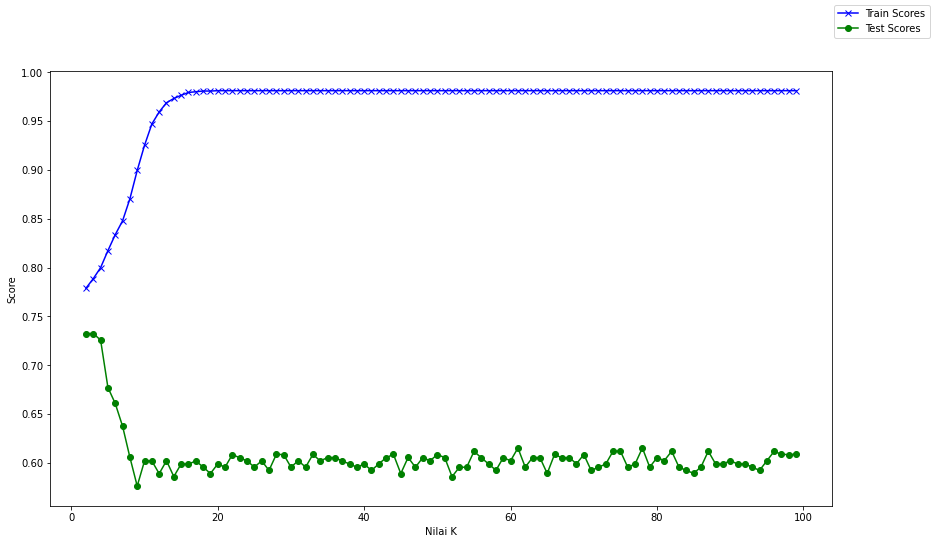

In [0]:
# 13. Ulangi tahap di atas namun kali ini menggunakan algoritma DecisionTreeClassifier dan kalian bisa menggunakan RandomizedSearchCV apabila process training lama. pelajari algoritma DecisionTreeClassifier di linkberikut : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html?highlight=decisiontreeclassifier#sklearn.tree.DecisionTreeClassifier
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_validate

X = df.drop('survival_status', axis=1)
y = df['survival_status']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=21, stratify=y, test_size=0.25)

model = DecisionTreeClassifier(random_state=42)
param_grid = {'max_leaf_nodes': list(range(2, 100)), 'min_samples_split': [2, 3, 4]}

rscv = RandomizedSearchCV(model, param_grid, verbose=1, scoring='roc_auc', cv=3)
rscv.fit(X, y)

print('Best Params : ', rscv.best_params_)
print('Best Score : ', rscv.best_score_)
print('Predict Proba : ', rscv.predict_proba(X_test))
print('Classes : ', rscv.classes_)
print('Predict Proba kurang dari 5 tahun : ', rscv.predict_proba(X_test)[:,1])

cv_score2 = cross_validate(model, X_test, y_test, cv=10, return_train_score=True)
print('Test Score : ', cv_score2['test_score'].mean())

def tree_predict(k):
    model = DecisionTreeClassifier(max_depth=k)
    score = cross_validate(model, X, y, cv=10, return_train_score=True)
    train_score = score['train_score'].mean()
    test_score = score['test_score'].mean()
    return train_score, test_score

train_scores = []
test_scores = []

for k in range(2, 100):
  train_score, test_score = tree_predict(k)
  train_scores.append(train_score)
  test_scores.append(test_score)

fig, ax = plt.subplots(figsize=(14, 8))

ax.plot(range(2, 100), train_scores, marker='x', color='b', label='Train Scores')
ax.plot(range(2, 100), test_scores, marker='o', color='g', label='Test Scores')
ax.set_xlabel('Nilai K')
ax.set_ylabel('Score')

fig.legend()
plt.show()
# Termasuk overfitting karena terlihat pada figure dibawah jika data training terlalu tinggi dibanding data test

In [0]:
# 14. Bandingkan scorenya dengan Algoritma KNN, mana yang lebih baik?
print('Algoritma KNN :', cv_score['test_score'].mean())
print('Algoritma Tree : ', cv_score2['test_score'].mean())

Algoritma KNN : 0.7160714285714286
Algoritma Tree :  0.6125
